# Hyperparameter Optimization

For this exercise, we will have a look at Hyperparameter Optimization --
instead of just choosing the best type of machine learning model, we also want
to choose the best hyperparameter setting for a task. The end result (i.e. the
predictive performance) is again not important; how you get there is.

Your deliverable will be a report, written in a style that it
would be suitable for inclusion in an academic paper as the "Experimental
Setup" section or similar. If unsure, check an academic paper of your choice,
for example [this one](https://www.eecs.uwyo.edu/~larsko/papers/pulatov_opening_2022-1.pdf). The
level of detail should be higher than in a typical academic paper though. Your
report should be at most five pages, including references and figures but
excluding appendices. It should have the following structure:
- Introduction: What problem are you solving, how are you going to solve it.
- Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.
- Experimental Setup: What specifically are you doing to solve the problem, i.e.\ what programming languages and libraries, how are you processing the data, what machine learning algorithms are you considering and what hyperparameters and value ranges, what measures you are using to evaluate them, what hyperparameter optimization method you chose, etc.
- Results: Description of what you observed, including plots. Compare
  performance before and after tuning, and show the best configuration.
- Code: Add the code you've used as a separate file.

Your report must contain enough detail to reproduce what you did without the
code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an
iPython notebook.

## Data and Setup

We will have a look at the [Wine Quality
dataset](https://archive-beta.ics.uci.edu/dataset/186/wine+quality). Choose the
one that corresponds to your preference in wine. You may also use a dataset of
your choice, for example one that's relevant to your research.

Choose a small number of different machine learning algorithms and
hyperparameters, along with value ranges, for each. You can use implementations
of AutoML systems (e.g. auto-sklearn), scientific papers, or the documentation
of the library you are using to determine the hyperparameters to tune and the
value ranges. Note that there is not only a single way to do this, but define a
reasonable space (e.g. don't include whether to turn on debug output, or random
forests with 1,000,000 trees, or tune the loss function). Your hyperparameter
search space should be so large that you cannot simply run a grid search.

Determine the best machine learning algorithm and hyperparameter setting for
your dataset. Make sure to optimize both the type of machine learning algorithm
and the hyperparameters at the same time (do not first choose the best ML
algorithm and then optimize its hyperparameters). Choose a suitable
hyperparameter optimizer; you could also use several and e.g. compare the
results achieved by random search and Bayesian optimization. Make sure that the
way you evaluate model performance avoids bias and overfitting. You could use
statistical tests to make this determination.

## Submission

Add your report and code to this repository. Bonus points if you can set up a
Github action to automatically run the code and generate the report!

## Resources Used
- "*Basics of HPO - Example and Practical Hints*" -From the AutoML Course Videos
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://www.youtube.com/watch?v=0wUF_Ov8b0A&t=1058s
- https://hpbandster-sklearn.readthedocs.io/en/latest/hpbandster_sklearn.html
- https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
- https://www.youtube.com/watch?v=-d338rc076s
- https://www.youtube.com/watch?v=XXFLFWHP9Nc
- https://www.youtube.com/watch?v=nuIqwnsrnH0

## Global Variables

In [ ]:
INNER_SPLITS = 2
OUTER_SPLITS = 5
RANDOM_STATE = 90
RANDOM_SEARCH_ITERATIONS = 24
BAYESIAN_OPTIMIZATION_ITERATIONS = 24

## Importing the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = red_wine_df.iloc[:, :-1]
y = red_wine_df['quality']

X.shape, y.shape

((1599, 11), (1599,))

## Importing the models
- Logistic Regression
- K-Nearest Neighbors
- Random Forest
- Support Vector Machine Classifier
- Decision Tree Classifier

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

In [ ]:
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [ ]:
random_forest_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

In [ ]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

In [ ]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Optimized Model Evaluations

All models will use Random Search and Bayesian Optimization for hyper-parameter optimization.




### Support Vector Machine Classifier Hyper-parameter *Optimization*

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'SVC': SVC
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'SVC': Tunable({
        'C': hp.FloatHyperParam(min=0.1, max=100, default=1.0),
        'kernel' : hp.CategoricalHyperParam(["linear", "rbf", "sigmoid"], default="rbf"),
        'degree' : hp.IntHyperParam(min=1, max=50, default=3),
        'gamma' : hp.CategoricalHyperParam(["scale", "auto"], default="scale"),
        "coef0" : hp.FloatHyperParam(min=0.0, max=1.0, default=0.0),
        "tol" : hp.FloatHyperParam(min=0.001, max=1.0, default=0.001),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

svc_bayesian_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

    best_model_name = best_result['name']
    hyperparameters = best_result['config']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**hyperparameters)

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    svc_bayesian_performance_estimates.append(score)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

C = uniform(loc=0.1, scale=100.0)
kernel = ["linear", "sigmoid", "rbf"]
degree = range(1, 50)
gamma = ["scale", "auto"]
coef0 = uniform(loc=0.0, scale=1.0)
tol = uniform(loc=0.001, scale=1.0)

hyperparameter_distribution = {
    "C": C,
    "kernel" : kernel,
    "degree" : degree,
    "gamma" : gamma,
    "coef0" : coef0,
    "tol" : tol,
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    svc_model,
    hyperparameter_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

svc_rs_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_search.fit(X_train, y_train)

    score = random_search.score(X_test, y_test)

    svc_rs_performance_estimates.append(score)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END C=9.172364112945052, coef0=0.35692376451033236, degree=43, gamma=auto, kernel=sigmoid, tol=0.09059044288074447;, score=0.425 total time=   0.0s
[CV 2/2] END C=9.172364112945052, coef0=0.35692376451033236, degree=43, gamma=auto, kernel=sigmoid, tol=0.09059044288074447;, score=0.426 total time=   0.0s
[CV 1/2] END C=30.911083676943786, coef0=0.7705681018854543, degree=12, gamma=auto, kernel=rbf, tol=0.6955856743813866;, score=0.527 total time=   0.1s
[CV 2/2] END C=30.911083676943786, coef0=0.7705681018854543, degree=12, gamma=auto, kernel=rbf, tol=0.6955856743813866;, score=0.548 total time=   0.1s
[CV 1/2] END C=98.97268783895592, coef0=0.45616015736028304, degree=26, gamma=scale, kernel=linear, tol=0.7545466308380728;, score=0.558 total time=  20.5s
[CV 2/2] END C=98.97268783895592, coef0=0.45616015736028304, degree=26, gamma=scale, kernel=linear, tol=0.7545466308380728;, score=0.551 total time=  12.9s
[CV 1/2] 

### Logistic Regression Hyper-parameter Optimization

#### Bayesian Optimization



In [ ]:
!pip install baytune

In [ ]:
models = {
    'LR_LBFGS': LogisticRegression,
    'LR_LIBLINEAR': LogisticRegression,
    'LR_NEWTONCG': LogisticRegression,
    'LR_NEWTONCHOLESKY': LogisticRegression,
    'LR_SAG': LogisticRegression,
    'LR_SAGA': LogisticRegression,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'LR_LBFGS': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["lbfgs"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_LIBLINEAR': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2"]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["liblinear"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cg"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCHOLESKY': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cholesky"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["sag"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAGA': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2", "elasticnet", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["saga"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

lr_bayesian_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    iterations = int(BAYESIAN_OPTIMIZATION_ITERATIONS / 6)
    best_result = session.run(iterations)

    best_model_name = best_result['name']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**best_result['config'])

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    lr_bayesian_performance_estimates.append(score)

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

lbfgs_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["lbfgs"],
    "max_iter" : range(1000, 5000),
}

liblinear_hpo_distribution = {
    "penalty" : ["l1", "l2"],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["liblinear"],
    "max_iter" : range(1000, 5000),
}

newtoncg_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["newton-cg"],
    "max_iter" : range(1000, 5000),
}

newtoncholesky_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["newton-cholesky"],
    "max_iter" : range(1000, 5000),
}

sag_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["sag"],
    "max_iter" : range(1000, 5000),
}

saga_hpo_distribution = {
    "penalty" : ["l1", "l2", "elasticnet", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["saga"],
    "max_iter" : range(1000, 5000),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

searches = []

iterations = int(RANDOM_SEARCH_ITERATIONS / 6)

lbfgs_random_search = RandomizedSearchCV(
    logistic_regression_model,
    lbfgs_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(lbfgs_random_search)

liblinear_random_search = RandomizedSearchCV(
    logistic_regression_model,
    liblinear_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(liblinear_random_search)

newtoncg_random_search = RandomizedSearchCV(
    logistic_regression_model,
    newtoncg_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(newtoncg_random_search)

newtoncholesky_random_search = RandomizedSearchCV(
    logistic_regression_model,
    newtoncholesky_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(newtoncholesky_random_search)

sag_random_search = RandomizedSearchCV(
    logistic_regression_model,
    sag_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(sag_random_search)

saga_random_search = RandomizedSearchCV(
    logistic_regression_model,
    saga_hpo_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(saga_random_search)

# --------------------------------------------------------------

lr_rs_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lbfgs_random_search.fit(X_train, y_train)
    liblinear_random_search.fit(X_train, y_train)
    newtoncg_random_search.fit(X_train, y_train)
    newtoncholesky_random_search.fit(X_train, y_train)
    sag_random_search.fit(X_train, y_train)
    saga_random_search.fit(X_train, y_train)


    best_search = None
    best_score = 0

    for search in searches:
        if search.best_score_ > best_score:
            best_score = search.best_score_
            best_search = search


    score = best_search.score(X_test, y_test)

    lr_rs_performance_estimates.append(score)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=556.9088216395993, max_iter=1344, penalty=l2, solver=lbfgs;, score=0.584 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=556.9088216395993, max_iter=1344, penalty=l2, solver=lbfgs;, score=0.568 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=264.5670741478034, max_iter=3963, penalty=l2, solver=lbfgs;, score=0.580 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=264.5670741478034, max_iter=3963, penalty=l2, solver=lbfgs;, score=0.573 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=434.28742794853883, max_iter=1622, penalty=None, solver=lbfgs;, score=0.583 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=434.28742794853883, max_iter=1622, penalty=None, solver=lbfgs;, score=0.571 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=834.0288556752616, max_iter=1688, penalty=l2, solver=lbfgs;, score=0.580 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=834.0288556752616, max_iter=1688, penalty=l2, solver=lbfgs;, score=0.565 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=878.9452351204142, max_iter=3773, penalty=l2, solver=liblinear;, score=0.581 total time=   0.1s
[CV 2/2] END C=878.9452351204142, max_iter=3773, penalty=l2, solver=liblinear;, score=0.562 total time=   0.0s
[CV 1/2] END C=811.3175663297632, max_iter=2002, penalty=l1, solver=liblinear;, score=0.584 total time=   0.7s
[CV 2/2] END C=811.3175663297632, max_iter=2002, penalty=l1, solver=liblinear;, score=0.563 total time=   1.7s
[CV 1/2] END C=273.1653220310555, max_iter=3466, penalty=l1, solver=liblinear;, score=0.583 total time=   0.9s
[CV 2/2] END C=273.1653220310555, max_iter=3466, penalty=l1, solver=liblinear;, score=0.562 total time=   1.8s
[CV 1/2] END C=891.228512122833, max_iter=3506, penalty=l2, solver=liblinear;, score=0.581 total time=   0.0s
[CV 2/2] END C=891.228512122833, max_iter=3506, penalty=l2, solver=liblinear;, score=0.557 total time=   0.0s
Fitting 2 folds for each of 4 candidates, totalling 8 f

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=125.90570928546785, max_iter=2455, penalty=None, solver=sag;, score=0.580 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=125.90570928546785, max_iter=2455, penalty=None, solver=sag;, score=0.559 total time=   1.0s
[CV 1/2] END C=109.78936933332473, max_iter=4580, penalty=l2, solver=sag;, score=0.584 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=109.78936933332473, max_iter=4580, penalty=l2, solver=sag;, score=0.559 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=825.5996710961718, max_iter=1794, penalty=l2, solver=sag;, score=0.580 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=825.5996710961718, max_iter=1794, penalty=l2, solver=sag;, score=0.559 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=575.7527353033383, max_iter=1564, penalty=None, solver=sag;, score=0.580 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=575.7527353033383, max_iter=1564, penalty=None, solver=sag;, score=0.560 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=163.38355881662093, max_iter=4212, penalty=None, solver=saga;, score=0.578 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=163.38355881662093, max_iter=4212, penalty=None, solver=saga;, score=0.557 total time=   1.8s
[CV 1/2] END C=895.8404110292304, max_iter=1057, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=895.8404110292304, max_iter=1057, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/2] END C=750.2729590139019, max_iter=3475, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=750.2729590139019, max_iter=3475, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=807.4078002930281, max_iter=2053, penalty=l2, solver=saga;, score=0.570 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_j

[CV 2/2] END C=807.4078002930281, max_iter=2053, penalty=l2, solver=saga;, score=0.552 total time=   0.9s
Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=705.5058445045765, max_iter=1765, penalty=l2, solver=lbfgs;, score=0.595 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=705.5058445045765, max_iter=1765, penalty=l2, solver=lbfgs;, score=0.595 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=516.8172169258136, max_iter=2400, penalty=None, solver=lbfgs;, score=0.591 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=516.8172169258136, max_iter=2400, penalty=None, solver=lbfgs;, score=0.590 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=644.0411063895231, max_iter=4145, penalty=None, solver=lbfgs;, score=0.592 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=644.0411063895231, max_iter=4145, penalty=None, solver=lbfgs;, score=0.585 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=714.128842559479, max_iter=4859, penalty=l2, solver=lbfgs;, score=0.583 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=714.128842559479, max_iter=4859, penalty=l2, solver=lbfgs;, score=0.590 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=12.758207703245771, max_iter=2550, penalty=l1, solver=liblinear;, score=0.588 total time=   0.3s
[CV 2/2] END C=12.758207703245771, max_iter=2550, penalty=l1, solver=liblinear;, score=0.570 total time=   0.3s
[CV 1/2] END C=170.48889621734332, max_iter=4515, penalty=l1, solver=liblinear;, score=0.584 total time=   0.7s
[CV 2/2] END C=170.48889621734332, max_iter=4515, penalty=l1, solver=liblinear;, score=0.577 total time=   0.6s
[CV 1/2] END C=797.0142369062582, max_iter=4019, penalty=l2, solver=liblinear;, score=0.586 total time=   0.0s
[CV 2/2] END C=797.0142369062582, max_iter=4019, penalty=l2, solver=liblinear;, score=0.581 total time=   0.0s
[CV 1/2] END C=894.7429504433284, max_iter=4140, penalty=l2, solver=liblinear;, score=0.586 total time=   0.0s
[CV 2/2] END C=894.7429504433284, max_iter=4140, penalty=l2, solver=liblinear;, score=0.581 total time=   0.0s
Fitting 2 folds for each of 4 candidates, totalli

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=94.18608132448004, max_iter=4010, penalty=None, solver=newton-cg;, score=0.595 total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=94.18608132448004, max_iter=4010, penalty=None, solver=newton-cg;, score=0.590 total time= 1.2min
[CV 1/2] END C=520.0142241988616, max_iter=2045, penalty=None, solver=newton-cg;, score=0.595 total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=520.0142241988616, max_iter=2045, penalty=None, solver=newton-cg;, score=0.588 total time=  32.7s
[CV 1/2] END C=360.18572877958934, max_iter=3630, penalty=None, solver=newton-cg;, score=0.595 total time=  28.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=360.18572877958934, max_iter=3630, penalty=None, solver=newton-cg;, score=0.590 total time= 1.0min
[CV 1/2] END C=874.8846644284971, max_iter=4709, penalty=None, solver=newton-cg;, score=0.595 total time=  28.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=874.8846644284971, max_iter=4709, penalty=None, solver=newton-cg;, score=0.590 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=345.15061808330233, max_iter=2414, penalty=l2, solver=newton-cholesky;, score=0.586 total time=   0.0s
[CV 2/2] END C=345.15061808330233, max_iter=2414, penalty=l2, solver=newton-cholesky;, score=0.579 total time=   0.0s
[CV 1/2] END C=208.61900285054747, max_iter=4717, penalty=l2, solver=newton-cholesky;, score=0.588 total time=   0.0s
[CV 2/2] END C=208.61900285054747, max_iter=4717, penalty=l2, solver=newton-cholesky;, score=0.579 total time=   0.0s
[CV 1/2] END C=486.241688424003, max_iter=3817, penalty=None, solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 2/2] END C=486.241688424003, max_iter=3817, penalty=None, solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 1/2] END C=617.6758226207577, max_iter=2139, penalty=l2, solver=newton-cholesky;, score=0.588 total time=   0.0s
[CV 2/2] END C=617.6758226207577, max_iter=2139, penalty=l2, solver=newton-cholesky;, score=0.579 total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=236.56139892576468, max_iter=4657, penalty=l2, solver=sag;, score=0.592 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=236.56139892576468, max_iter=4657, penalty=l2, solver=sag;, score=0.571 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=664.8806353563978, max_iter=3851, penalty=l2, solver=sag;, score=0.589 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=664.8806353563978, max_iter=3851, penalty=l2, solver=sag;, score=0.568 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=630.1437731876747, max_iter=2512, penalty=l2, solver=sag;, score=0.589 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=630.1437731876747, max_iter=2512, penalty=l2, solver=sag;, score=0.573 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=957.7643589211764, max_iter=2663, penalty=l2, solver=sag;, score=0.588 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=957.7643589211764, max_iter=2663, penalty=l2, solver=sag;, score=0.573 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=245.68498775406457, max_iter=4634, penalty=l2, solver=saga;, score=0.588 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=245.68498775406457, max_iter=4634, penalty=l2, solver=saga;, score=0.573 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=659.1269090799818, max_iter=1601, penalty=None, solver=saga;, score=0.570 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=659.1269090799818, max_iter=1601, penalty=None, solver=saga;, score=0.562 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=637.3486238241185, max_iter=1463, penalty=l2, solver=saga;, score=0.570 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=637.3486238241185, max_iter=1463, penalty=l2, solver=saga;, score=0.554 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=784.568819695705, max_iter=3731, penalty=None, solver=saga;, score=0.584 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=784.568819695705, max_iter=3731, penalty=None, solver=saga;, score=0.573 total time=   1.6s
Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=269.3059282083656, max_iter=2335, penalty=l2, solver=lbfgs;, score=0.562 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=269.3059282083656, max_iter=2335, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=796.8064751561304, max_iter=4773, penalty=l2, solver=lbfgs;, score=0.558 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=796.8064751561304, max_iter=4773, penalty=l2, solver=lbfgs;, score=0.615 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=160.0438692113858, max_iter=4716, penalty=None, solver=lbfgs;, score=0.561 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=160.0438692113858, max_iter=4716, penalty=None, solver=lbfgs;, score=0.610 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=266.63027492624286, max_iter=2200, penalty=l2, solver=lbfgs;, score=0.564 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=266.63027492624286, max_iter=2200, penalty=l2, solver=lbfgs;, score=0.613 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=703.0281994036403, max_iter=1889, penalty=l2, solver=liblinear;, score=0.569 total time=   0.0s
[CV 2/2] END C=703.0281994036403, max_iter=1889, penalty=l2, solver=liblinear;, score=0.593 total time=   0.0s
[CV 1/2] END C=597.1812693721421, max_iter=3724, penalty=l2, solver=liblinear;, score=0.570 total time=   0.0s
[CV 2/2] END C=597.1812693721421, max_iter=3724, penalty=l2, solver=liblinear;, score=0.593 total time=   0.0s
[CV 1/2] END C=277.7483566164032, max_iter=2532, penalty=l2, solver=liblinear;, score=0.567 total time=   0.0s
[CV 2/2] END C=277.7483566164032, max_iter=2532, penalty=l2, solver=liblinear;, score=0.595 total time=   0.0s
[CV 1/2] END C=763.7796385813061, max_iter=2117, penalty=l1, solver=liblinear;, score=0.564 total time=   1.1s
[CV 2/2] END C=763.7796385813061, max_iter=2117, penalty=l1, solver=liblinear;, score=0.595 total time=   0.6s
Fitting 2 folds for each of 4 candidates, totalling 8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=413.20794696316256, max_iter=1365, penalty=None, solver=newton-cg;, score=0.572 total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/2] END C=413.20794696316256, max_iter=1365, penalty=None, solver=newton-cg;, score=0.595 total time=  18.5s
[CV 1/2] END C=340.32988434502613, max_iter=1109, penalty=l2, solver=newton-cg;, score=0.562 total time=   1.0s
[CV 2/2] END C=340.32988434502613, max_iter=1109, penalty=l2, solver=newton-cg;, score=0.610 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=200.38315787611694, max_iter=1060, penalty=None, solver=newton-cg;, score=0.572 total time=  17.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=200.38315787611694, max_iter=1060, penalty=None, solver=newton-cg;, score=0.595 total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=225.07406476538972, max_iter=4758, penalty=None, solver=newton-cg;, score=0.572 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/2] END C=225.07406476538972, max_iter=4758, penalty=None, solver=newton-cg;, score=0.592 total time= 1.2min
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=303.36006105301686, max_iter=2027, penalty=l2, solver=newton-cholesky;, score=0.570 total time=   0.0s
[CV 2/2] END C=303.36006105301686, max_iter=2027, penalty=l2, solver=newton-cholesky;, score=0.593 total time=   0.0s
[CV 1/2] END C=51.56367830871768, max_iter=1962, penalty=None, solver=newton-cholesky;, score=0.569 total time=   0.0s
[CV 2/2] END C=51.56367830871768, max_iter=1962, penalty=None, solver=newton-cholesky;, score=0.596 total time=   0.0s
[CV 1/2] END C=292.54204070549883, max_iter=2826, penalty=l2, solver=newton-cholesky;, score=0.570 total time=   0.0s
[CV 2/2] END C=292.54204070549883, max_iter=2826, penalty=l2, solver=newton-cholesky;, score=0.593 total time=   0.0s
[CV 1/2] END C=236.34159733989114, max_iter=3255, penalty=None, solver=newton-cholesky;, score=0.569 total time=   0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=843.8697834771189, max_iter=2763, penalty=l2, solver=sag;, score=0.564 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=843.8697834771189, max_iter=2763, penalty=l2, solver=sag;, score=0.599 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=155.3544856366833, max_iter=2143, penalty=None, solver=sag;, score=0.564 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=155.3544856366833, max_iter=2143, penalty=None, solver=sag;, score=0.604 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=675.2060308911722, max_iter=4188, penalty=l2, solver=sag;, score=0.564 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=675.2060308911722, max_iter=4188, penalty=l2, solver=sag;, score=0.599 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=123.4843300741052, max_iter=1587, penalty=None, solver=sag;, score=0.561 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=123.4843300741052, max_iter=1587, penalty=None, solver=sag;, score=0.607 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=740.4741890852625, max_iter=1695, penalty=l1, solver=saga;, score=0.537 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=740.4741890852625, max_iter=1695, penalty=l1, solver=saga;, score=0.610 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=318.21734284067253, max_iter=1018, penalty=l2, solver=saga;, score=0.523 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=318.21734284067253, max_iter=1018, penalty=l2, solver=saga;, score=0.595 total time=   0.5s
[CV 1/2] END C=176.2896783634571, max_iter=1827, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=176.2896783634571, max_iter=1827, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=674.3722216844303, max_iter=2035, penalty=None, solver=saga;, score=0.542 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_j

[CV 2/2] END C=674.3722216844303, max_iter=2035, penalty=None, solver=saga;, score=0.599 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=975.4083161341467, max_iter=2403, penalty=None, solver=lbfgs;, score=0.588 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=975.4083161341467, max_iter=2403, penalty=None, solver=lbfgs;, score=0.592 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=60.42575998775436, max_iter=2405, penalty=l2, solver=lbfgs;, score=0.605 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=60.42575998775436, max_iter=2405, penalty=l2, solver=lbfgs;, score=0.593 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=681.9464310809541, max_iter=3935, penalty=l2, solver=lbfgs;, score=0.595 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=681.9464310809541, max_iter=3935, penalty=l2, solver=lbfgs;, score=0.596 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=406.59812767841623, max_iter=4402, penalty=l2, solver=lbfgs;, score=0.597 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=406.59812767841623, max_iter=4402, penalty=l2, solver=lbfgs;, score=0.596 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=565.9669092284704, max_iter=3448, penalty=l1, solver=liblinear;, score=0.570 total time=   0.9s
[CV 2/2] END C=565.9669092284704, max_iter=3448, penalty=l1, solver=liblinear;, score=0.601 total time=   0.7s
[CV 1/2] END C=600.863636899896, max_iter=1356, penalty=l2, solver=liblinear;, score=0.570 total time=   0.0s
[CV 2/2] END C=600.863636899896, max_iter=1356, penalty=l2, solver=liblinear;, score=0.599 total time=   0.0s
[CV 1/2] END C=184.91427003610207, max_iter=2571, penalty=l1, solver=liblinear;, score=0.569 total time=   1.3s
[CV 2/2] END C=184.91427003610207, max_iter=2571, penalty=l1, solver=liblinear;, score=0.603 total time=   1.0s
[CV 1/2] END C=695.6588724560435, max_iter=3383, penalty=l1, solver=liblinear;, score=0.569 total time=   1.0s
[CV 2/2] END C=695.6588724560435, max_iter=3383, penalty=l1, solver=liblinear;, score=0.601 total time=   0.7s
Fitting 2 folds for each of 4 candidates, totalling 8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=540.9987056609292, max_iter=3734, penalty=None, solver=newton-cg;, score=0.589 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=540.9987056609292, max_iter=3734, penalty=None, solver=newton-cg;, score=0.592 total time=  59.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=979.5062336277338, max_iter=3456, penalty=None, solver=newton-cg;, score=0.589 total time=  56.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/2] END C=979.5062336277338, max_iter=3456, penalty=None, solver=newton-cg;, score=0.592 total time=  55.8s
[CV 1/2] END C=112.02271504965222, max_iter=3883, penalty=l2, solver=newton-cg;, score=0.595 total time=   0.7s
[CV 2/2] END C=112.02271504965222, max_iter=3883, penalty=l2, solver=newton-cg;, score=0.592 total time=   0.5s
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=708.4298255569872, max_iter=3350, penalty=l2, solver=newton-cholesky;, score=0.572 total time=   0.0s
[CV 2/2] END C=708.4298255569872, max_iter=3350, penalty=l2, solver=newton-cholesky;, score=0.595 total time=   0.0s
[CV 1/2] END C=421.3565452962135, max_iter=1200, penalty=None, solver=newton-cholesky;, score=0.575 total time=   0.0s
[CV 2/2] END C=421.3565452962135, max_iter=1200, penalty=None, solver=newton-cholesky;, score=0.595 total time=   0.0s
[CV 1/2] END C=144.81562447439, max_iter=4599, penalty=l2, solver=newton-cholesky;, score=0.570 total time=   0.0s
[CV 2/2] END C=14

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #14. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore 

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=550.0679141947949, max_iter=4452, penalty=l2, solver=sag;, score=0.577 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=550.0679141947949, max_iter=4452, penalty=l2, solver=sag;, score=0.603 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=385.1260598570458, max_iter=1586, penalty=None, solver=sag;, score=0.566 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=385.1260598570458, max_iter=1586, penalty=None, solver=sag;, score=0.588 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=771.5362725287582, max_iter=3179, penalty=None, solver=sag;, score=0.573 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=771.5362725287582, max_iter=3179, penalty=None, solver=sag;, score=0.588 total time=   1.2s
[CV 1/2] END C=162.10001480836212, max_iter=4345, penalty=None, solver=sag;, score=0.577 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=162.10001480836212, max_iter=4345, penalty=None, solver=sag;, score=0.601 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=346.05226456511434, max_iter=4502, penalty=l2, solver=saga;, score=0.562 total time=   2.6s
[CV 2/2] END C=346.05226456511434, max_iter=4502, penalty=l2, solver=saga;, score=0.588 total time=   1.7s
[CV 1/2] END C=202.73306118008117, max_iter=3194, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=202.73306118008117, max_iter=3194, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=333.6531684158545, max_iter=1893, penalty=l2, solver=saga;, score=0.556 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=333.6531684158545, max_iter=1893, penalty=l2, solver=saga;, score=0.603 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=314.2307795224755, max_iter=1918, penalty=l1, solver=saga;, score=0.556 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_j

[CV 2/2] END C=314.2307795224755, max_iter=1918, penalty=l1, solver=saga;, score=0.603 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=38.424825490709374, max_iter=1991, penalty=l2, solver=lbfgs;, score=0.578 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=38.424825490709374, max_iter=1991, penalty=l2, solver=lbfgs;, score=0.598 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=787.4908165737949, max_iter=2239, penalty=l2, solver=lbfgs;, score=0.575 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=787.4908165737949, max_iter=2239, penalty=l2, solver=lbfgs;, score=0.598 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=669.847866147554, max_iter=1951, penalty=l2, solver=lbfgs;, score=0.564 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=669.847866147554, max_iter=1951, penalty=l2, solver=lbfgs;, score=0.597 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=15.29772420468568, max_iter=2161, penalty=None, solver=lbfgs;, score=0.573 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=15.29772420468568, max_iter=2161, penalty=None, solver=lbfgs;, score=0.598 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=777.5369078909197, max_iter=1604, penalty=l2, solver=liblinear;, score=0.575 total time=   0.0s
[CV 2/2] END C=777.5369078909197, max_iter=1604, penalty=l2, solver=liblinear;, score=0.583 total time=   0.0s
[CV 1/2] END C=757.1876777047777, max_iter=3477, penalty=l1, solver=liblinear;, score=0.570 total time=   5.0s
[CV 2/2] END C=757.1876777047777, max_iter=3477, penalty=l1, solver=liblinear;, score=0.586 total time=   0.7s
[CV 1/2] END C=725.2389774106252, max_iter=2877, penalty=l1, solver=liblinear;, score=0.570 total time=   5.7s
[CV 2/2] END C=725.2389774106252, max_iter=2877, penalty=l1, solver=liblinear;, score=0.588 total time=   0.8s
[CV 1/2] END C=7.214022177782453, max_iter=4122, penalty=l1, solver=liblinear;, score=0.577 total time=   0.3s
[CV 2/2] END C=7.214022177782453, max_iter=4122, penalty=l1, solver=liblinear;, score=0.581 total time=   0.2s
Fitting 2 folds for each of 4 candidates, totalling 8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=556.1631592808167, max_iter=3170, penalty=None, solver=newton-cg;, score=0.567 total time=  50.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=556.1631592808167, max_iter=3170, penalty=None, solver=newton-cg;, score=0.588 total time=  55.2s
[CV 1/2] END C=731.5559698569249, max_iter=3234, penalty=None, solver=newton-cg;, score=0.567 total time=  51.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/2] END C=731.5559698569249, max_iter=3234, penalty=None, solver=newton-cg;, score=0.584 total time=  56.6s
[CV 1/2] END C=292.70545326149994, max_iter=3107, penalty=l2, solver=newton-cg;, score=0.572 total time=   1.3s
[CV 2/2] END C=292.70545326149994, max_iter=3107, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.9s
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=776.5482782648637, max_iter=4846, penalty=l2, solver=newton-cholesky;, score=0.570 total time=   0.0s
[CV 2/2] END C=776.5482782648637, max_iter=4846, penalty=l2, solver=newton-cholesky;, score=0.583 total time=   0.0s
[CV 1/2] END C=133.40155892321314, max_iter=1237, penalty=l2, solver=newton-cholesky;, score=0.572 total time=   0.0s
[CV 2/2] END C=133.40155892321314, max_iter=1237, penalty=l2, solver=newton-cholesky;, score=0.588 total time=   0.0s
[CV 1/2] END C=884.9424375063446, max_iter=2721, penalty=l2, solver=newton-cholesky;, score=0.569 total time=   0.0s
[CV 2/2] END C=88

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #13. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore 

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=834.4937003930992, max_iter=1496, penalty=None, solver=sag;, score=0.567 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=834.4937003930992, max_iter=1496, penalty=None, solver=sag;, score=0.591 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=533.1962643317024, max_iter=3345, penalty=None, solver=sag;, score=0.578 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=533.1962643317024, max_iter=3345, penalty=None, solver=sag;, score=0.589 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=35.42552680916468, max_iter=2873, penalty=None, solver=sag;, score=0.575 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=35.42552680916468, max_iter=2873, penalty=None, solver=sag;, score=0.588 total time=   1.1s
[CV 1/2] END C=826.9821934938211, max_iter=4021, penalty=l2, solver=sag;, score=0.578 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=826.9821934938211, max_iter=4021, penalty=l2, solver=sag;, score=0.591 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=955.2045198593355, max_iter=1852, penalty=l1, solver=saga;, score=0.559 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END C=955.2045198593355, max_iter=1852, penalty=l1, solver=saga;, score=0.580 total time=   1.2s
[CV 1/2] END C=689.7404606674854, max_iter=3800, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=689.7404606674854, max_iter=3800, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END C=906.44721702956, max_iter=2801, penalty=None, solver=saga;, score=0.566 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_j

[CV 2/2] END C=906.44721702956, max_iter=2801, penalty=None, solver=saga;, score=0.589 total time=   1.2s
[CV 1/2] END C=198.31357562986375, max_iter=2811, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/2] END C=198.31357562986375, max_iter=2811, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### K-Nearest Neighbors Hyper-parameter Optimization

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'KNN': KNeighborsClassifier,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'KNN': Tunable({
        'n_neighbors': hp.IntHyperParam(min=1, max=1000, default=5),
        'weights' : hp.CategoricalHyperParam(choices=['uniform', 'distance'], default='uniform'),
        'algorithm' : hp.CategoricalHyperParam(choices=['auto', 'ball_tree', 'kd_tree', 'brute'], default='auto'),
        'leaf_size' : hp.IntHyperParam(min=1, max=100000, default=30),
        'p' : hp.IntHyperParam(min=1, max=100000, default=2)
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

knn_bayesian_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

    best_model_name = best_result['name']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**best_result['config'])

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    knn_bayesian_performance_estimates.append(score)

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
ValueError: 

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
V

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
V

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
ValueError: 

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
k_neighbors = range(1, 500)
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_sizes = range(1, 100000)
p_values = range(1, 100000)

hyperparameter_distribution = {
    "n_neighbors" : k_neighbors,
    "weights" : weights,
    "algorithm" : algorithms,
    "leaf_size" : leaf_sizes,
    "p" : p_values
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    knn_model,
    hyperparameter_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

knn_rs_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_search.fit(X_train, y_train)

    score = random_search.score(X_test, y_test)

    knn_rs_performance_estimates.append(score)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END algorithm=auto, leaf_size=44475, n_neighbors=433, p=90562, weights=distance;, score=0.492 total time=   0.2s
[CV 2/2] END algorithm=auto, leaf_size=44475, n_neighbors=433, p=90562, weights=distance;, score=0.507 total time=   0.6s
[CV 1/2] END algorithm=kd_tree, leaf_size=48972, n_neighbors=21, p=83859, weights=distance;, score=0.305 total time=   0.5s
[CV 2/2] END algorithm=kd_tree, leaf_size=48972, n_neighbors=21, p=83859, weights=distance;, score=0.275 total time=   0.3s
[CV 1/2] END algorithm=ball_tree, leaf_size=72009, n_neighbors=110, p=23760, weights=distance;, score=0.305 total time=   0.4s
[CV 2/2] END algorithm=ball_tree, leaf_size=72009, n_neighbors=110, p=23760, weights=distance;, score=0.275 total time=   0.3s
[CV 1/2] END algorithm=ball_tree, leaf_size=98569, n_neighbors=175, p=79825, weights=uniform;, score=0.425 total time=   0.5s
[CV 2/2] END algorithm=ball_tree, leaf_size=98569, n_neighbors=175,

### Random Forest Hyper-parameter Optimization

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'RF' : RandomForestClassifier
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'RF': Tunable({
        'n_estimators' : hp.IntHyperParam(min=50, max=1000, default=100),
        'criterion' : hp.CategoricalHyperParam(['gini', 'entropy', 'log_loss'], default='gini'),
        'max_depth': hp.IntHyperParam(min=1, max=100, default=5),
        'min_samples_split': hp.IntHyperParam(min=2, max=100, default=2),
        'min_samples_leaf': hp.IntHyperParam(min=1, max=100, default=1),
        'min_weight_fraction_leaf': hp.FloatHyperParam(min=0.0, max=0.5, default=0.0),
        'max_features': hp.CategoricalHyperParam(["sqrt", "log2", None], default='sqrt'),
    })
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

rf_bayesian_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

    best_model_name = best_result['name']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**best_result['config'])

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    rf_bayesian_performance_estimates.append(score)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

n_estimators = range(50, 1000)
criterion = ['gini', 'entropy', 'log_loss']
max_depth = range(1, 100)
min_samples_split = range(2, 100)
min_samples_leaf = range(1, 100)
min_weight_fraction_leaf = uniform(scale=0.5)
max_features = ["sqrt", "log2", None]

hyperparameter_distribution = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "min_weight_fraction_leaf" : min_weight_fraction_leaf,
    "max_features" : max_features,
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    random_forest_classifier,
    hyperparameter_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

rf_rs_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_search.fit(X_train, y_train)

    score = random_search.score(X_test, y_test)

    rf_rs_performance_estimates.append(score)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END criterion=entropy, max_depth=94, max_features=None, min_samples_leaf=84, min_samples_split=22, min_weight_fraction_leaf=0.434613084143714, n_estimators=912;, score=0.556 total time=   2.5s
[CV 2/2] END criterion=entropy, max_depth=94, max_features=None, min_samples_leaf=84, min_samples_split=22, min_weight_fraction_leaf=0.434613084143714, n_estimators=912;, score=0.546 total time=   4.4s
[CV 1/2] END criterion=log_loss, max_depth=2, max_features=None, min_samples_leaf=9, min_samples_split=15, min_weight_fraction_leaf=0.1473449044135876, n_estimators=961;, score=0.570 total time=   4.4s
[CV 2/2] END criterion=log_loss, max_depth=2, max_features=None, min_samples_leaf=9, min_samples_split=15, min_weight_fraction_leaf=0.1473449044135876, n_estimators=961;, score=0.549 total time=   5.1s
[CV 1/2] END criterion=entropy, max_depth=99, max_features=None, min_samples_leaf=30, min_samples_split=79, min_weight_fraction_lea

### Decision Tree Classifier Hyper-parameter Optimization

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

hyperparameter_distribution = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : range(1, 1000),
    "min_samples_split" : range(2, 100),
    "min_samples_leaf" : range(1, 100),
    "min_weight_fraction_leaf" : uniform(loc=0.0, scale=0.5),
    "max_features" : ["sqrt", "log2", None],
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    decision_tree_model,
    hyperparameter_distribution,
    cv=inner_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

dtc_rs_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_search.fit(X_train, y_train)

    score = random_search.score(X_test, y_test)

    dtc_rs_performance_estimates.append(score)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END criterion=gini, max_depth=972, max_features=sqrt, min_samples_leaf=92, min_samples_split=71, min_weight_fraction_leaf=0.4997959486127225, splitter=best;, score=0.425 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=972, max_features=sqrt, min_samples_leaf=92, min_samples_split=71, min_weight_fraction_leaf=0.4997959486127225, splitter=best;, score=0.426 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=526, max_features=log2, min_samples_leaf=99, min_samples_split=25, min_weight_fraction_leaf=0.017151874197853578, splitter=random;, score=0.503 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=526, max_features=log2, min_samples_leaf=99, min_samples_split=25, min_weight_fraction_leaf=0.017151874197853578, splitter=random;, score=0.516 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=346, max_features=log2, min_samples_leaf=2, min_samples_split=20, min_weight_fraction_leaf=0.0627515

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'DTC': DecisionTreeClassifier,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'DTC': Tunable({
        'criterion' : hp.CategoricalHyperParam(["gini", "entropy", "log_loss"], default='gini'),
        'splitter' : hp.CategoricalHyperParam(["best", "random"], default='best'),
        'max_depth': hp.IntHyperParam(min=1, max=1000, default=5),
        'min_samples_split': hp.IntHyperParam(min=2, max=100, default=2),
        'min_samples_leaf': hp.IntHyperParam(min=1, max=100, default=1),
        'min_weight_fraction_leaf': hp.FloatHyperParam(min=0.0, max=0.5, default=0.0),
        'max_features': hp.CategoricalHyperParam(["sqrt", "log2", None], default=None),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
outer_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

dtc_bayesian_performance_estimates = []

for train_index, test_index in outer_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

    best_model_name = best_result['name']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**best_result['config'])

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    dtc_bayesian_performance_estimates.append(score)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

### Summarizing Model Performance Estimates

<ipython-input-51-7a7b348d60fd>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names)


[Text(0, 0, 'DTC_BAY'),
 Text(1, 0, 'DTC_RS'),
 Text(2, 0, 'KNN_BAY'),
 Text(3, 0, 'KNN_RS'),
 Text(4, 0, 'LR_BAY'),
 Text(5, 0, 'LR_RS'),
 Text(6, 0, 'RF_BAY'),
 Text(7, 0, 'RF_RS'),
 Text(8, 0, 'SVC_BAY'),
 Text(9, 0, 'SVC_RS')]

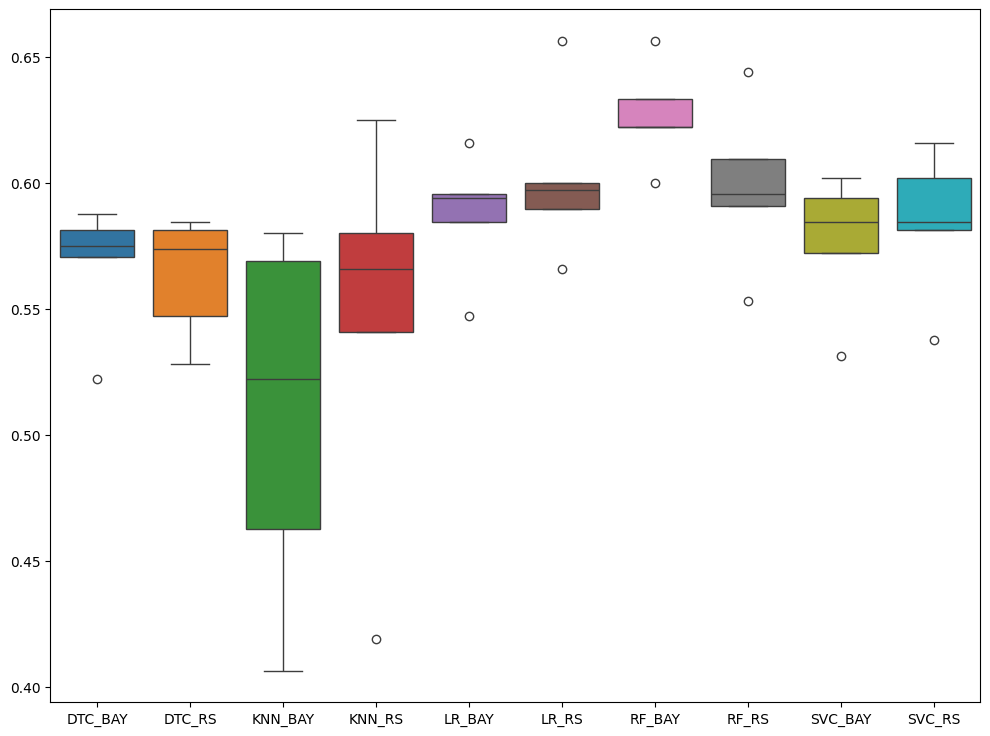

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model_performance_estimates = [
    dtc_bayesian_performance_estimates,
    dtc_rs_performance_estimates,
    knn_bayesian_performance_estimates,
    knn_rs_performance_estimates,
    lr_bayesian_performance_estimates,
    lr_rs_performance_estimates,
    rf_bayesian_performance_estimates,
    rf_rs_performance_estimates,
    svc_bayesian_performance_estimates,
    svc_rs_performance_estimates,
]

model_names = [
    'DTC_BAY',
    'DTC_RS',
    'KNN_BAY',
    'KNN_RS',
    'LR_BAY',
    'LR_RS',
    'RF_BAY',
    'RF_RS',
    'SVC_BAY',
    'SVC_RS',
]

fig, ax = plt.subplots(figsize=(12, 9))

sns.boxplot(data=model_performance_estimates, ax=ax)

ax.set_xticklabels(model_names)

In [ ]:
for model_name, performance_estimates in zip(model_names, model_performance_estimates):

  print("**************************")
  print(f"{model_name} : A mean of {round(np.mean(performance_estimates), 2)} with standard deviation of {round(np.std(performance_estimates), 2)}")
  print("**************************")


**************************
DTC_BAY : A mean of 0.57 with standard deviation of 0.02
**************************
**************************
DTC_RS : A mean of 0.56 with standard deviation of 0.02
**************************
**************************
KNN_BAY : A mean of 0.51 with standard deviation of 0.07
**************************
**************************
KNN_RS : A mean of 0.55 with standard deviation of 0.07
**************************
**************************
LR_BAY : A mean of 0.59 with standard deviation of 0.02
**************************
**************************
LR_RS : A mean of 0.6 with standard deviation of 0.03
**************************
**************************
RF_BAY : A mean of 0.63 with standard deviation of 0.02
**************************
**************************
RF_RS : A mean of 0.6 with standard deviation of 0.03
**************************
**************************
SVC_BAY : A mean of 0.58 with standard deviation of 0.02
**************************
***********

## Model Hyper-parameter Selection

### Support Vector Machine

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

C = uniform(loc=0.1, scale=100.0)
kernel = ["linear", "rbf", "sigmoid"]
degree = range(1, 50)
gamma = ["scale", "auto"]
coef0 = uniform(loc=0.0, scale=1.0)
tol = uniform(loc=0.001, scale=1.0)

hyperparameter_distribution = {
    "C": C,
    "kernel" : kernel,
    "degree" : degree,
    "gamma" : gamma,
    "coef0" : coef0,
    "tol" : tol,
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    svc_model,
    hyperparameter_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

random_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=57.662499189246034, coef0=0.8336502826299099, degree=6, gamma=auto, kernel=linear, tol=0.8317995131531802;, score=0.609 total time=  36.1s
[CV 2/5] END C=57.662499189246034, coef0=0.8336502826299099, degree=6, gamma=auto, kernel=linear, tol=0.8317995131531802;, score=0.569 total time=  13.9s
[CV 3/5] END C=57.662499189246034, coef0=0.8336502826299099, degree=6, gamma=auto, kernel=linear, tol=0.8317995131531802;, score=0.550 total time=   9.5s
[CV 4/5] END C=57.662499189246034, coef0=0.8336502826299099, degree=6, gamma=auto, kernel=linear, tol=0.8317995131531802;, score=0.578 total time=  13.3s
[CV 5/5] END C=57.662499189246034, coef0=0.8336502826299099, degree=6, gamma=auto, kernel=linear, tol=0.8317995131531802;, score=0.608 total time=  12.3s
[CV 1/5] END C=88.952973703747, coef0=0.6834444855851959, degree=15, gamma=scale, kernel=linear, tol=0.7624991112752518;, score=0.619 total time=  21.2s
[CV 2/5] END C=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=90, shuffle=True),
                   estimator=SVC(), n_iter=24,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9a081a4160>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9a074ff0a0>,
                                        'degree': range(1, 50),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9a081a49a0>},
                   scoring='accuracy', verbose=4)

In [ ]:
print(random_search.best_params_)
print(random_search.best_score_)

{'C': 56.57190440012665, 'coef0': 0.26223957885322546, 'degree': 35, 'gamma': 'auto', 'kernel': 'linear', 'tol': 0.6371763289553357}
0.588509012539185


#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'SVC': SVC
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'SVC': Tunable({
        'C': hp.FloatHyperParam(min=0.1, max=100, default=1.0),
        'kernel' : hp.CategoricalHyperParam(["linear", "rbf", "sigmoid"], default="rbf"),
        'degree' : hp.IntHyperParam(min=1, max=50, default=3),
        'gamma' : hp.CategoricalHyperParam(["scale", "auto"], default="scale"),
        "coef0" : hp.FloatHyperParam(min=0.0, max=1.0, default=0.0),
        "tol" : hp.FloatHyperParam(min=0.001, max=1.0, default=0.001),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        cv=cv_fold,
        estimator=model_instance,
        X=X,
        y=y,
        scoring='accuracy',
    )

    return scores.mean()

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True,
)

best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
print(best_result['config'])
print(best_result['score'])

{'C': 2.328559041154129, 'kernel': 'linear', 'degree': 23, 'gamma': 'auto', 'coef0': 0.6630230454460299, 'tol': 0.4377029466655704}
0.5885050940438872


### Logistic Regression

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

lbfgs_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["lbfgs"],
    "max_iter" : range(1000, 5000),
}

liblinear_hpo_distribution = {
    "penalty" : ["l1", "l2"],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["liblinear"],
    "max_iter" : range(1000, 5000),
}

newtoncg_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["newton-cg"],
    "max_iter" : range(1000, 5000),
}

newtoncholesky_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["newton-cholesky"],
    "max_iter" : range(1000, 5000),
}

sag_hpo_distribution = {
    "penalty" : ["l2", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["sag"],
    "max_iter" : range(1000, 5000),
}

saga_hpo_distribution = {
    "penalty" : ["l1", "l2", "elasticnet", None],
    "C" : uniform(loc=0.1, scale=1000.0),
    "solver" : ["saga"],
    "max_iter" : range(1000, 5000),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

iterations = int(RANDOM_SEARCH_ITERATIONS / 6)

lbfgs_random_search = RandomizedSearchCV(
    logistic_regression_model,
    lbfgs_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(lbfgs_random_search)

liblinear_random_search = RandomizedSearchCV(
    logistic_regression_model,
    liblinear_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(liblinear_random_search)

newtoncg_random_search = RandomizedSearchCV(
    logistic_regression_model,
    newtoncg_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(newtoncg_random_search)

newtoncholesky_random_search = RandomizedSearchCV(
    logistic_regression_model,
    newtoncholesky_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(newtoncholesky_random_search)

sag_random_search = RandomizedSearchCV(
    logistic_regression_model,
    sag_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(sag_random_search)

saga_random_search = RandomizedSearchCV(
    logistic_regression_model,
    saga_hpo_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=iterations,
    verbose=4
)

searches.append(saga_random_search)

# --------------------------------------------------------------

lbfgs_random_search.fit(X, y)
liblinear_random_search.fit(X, y)
newtoncg_random_search.fit(X, y)
newtoncholesky_random_search.fit(X, y)
sag_random_search.fit(X, y)
saga_random_search.fit(X, y)


best_search = None
best_score = 0

for search in searches:
    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_search = search


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=834.7109096902446, max_iter=2064, penalty=None, solver=lbfgs;, score=0.656 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=834.7109096902446, max_iter=2064, penalty=None, solver=lbfgs;, score=0.597 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=834.7109096902446, max_iter=2064, penalty=None, solver=lbfgs;, score=0.569 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=834.7109096902446, max_iter=2064, penalty=None, solver=lbfgs;, score=0.597 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=834.7109096902446, max_iter=2064, penalty=None, solver=lbfgs;, score=0.589 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=647.6417424750009, max_iter=2046, penalty=None, solver=lbfgs;, score=0.659 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=647.6417424750009, max_iter=2046, penalty=None, solver=lbfgs;, score=0.597 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=647.6417424750009, max_iter=2046, penalty=None, solver=lbfgs;, score=0.575 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=647.6417424750009, max_iter=2046, penalty=None, solver=lbfgs;, score=0.603 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=647.6417424750009, max_iter=2046, penalty=None, solver=lbfgs;, score=0.589 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=628.4294259225687, max_iter=2222, penalty=l2, solver=lbfgs;, score=0.656 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=628.4294259225687, max_iter=2222, penalty=l2, solver=lbfgs;, score=0.600 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=628.4294259225687, max_iter=2222, penalty=l2, solver=lbfgs;, score=0.566 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=628.4294259225687, max_iter=2222, penalty=l2, solver=lbfgs;, score=0.594 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=628.4294259225687, max_iter=2222, penalty=l2, solver=lbfgs;, score=0.589 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=492.89598463939046, max_iter=4161, penalty=l2, solver=lbfgs;, score=0.647 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=492.89598463939046, max_iter=4161, penalty=l2, solver=lbfgs;, score=0.597 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=492.89598463939046, max_iter=4161, penalty=l2, solver=lbfgs;, score=0.575 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=492.89598463939046, max_iter=4161, penalty=l2, solver=lbfgs;, score=0.591 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=492.89598463939046, max_iter=4161, penalty=l2, solver=lbfgs;, score=0.583 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=971.0128835716176, max_iter=2304, penalty=l2, solver=liblinear;, score=0.619 total time=   0.1s
[CV 2/5] END C=971.0128835716176, max_iter=2304, penalty=l2, solver=liblinear;, score=0.588 total time=   0.1s
[CV 3/5] END C=971.0128835716176, max_iter=2304, penalty=l2, solver=liblinear;, score=0.559 total time=   0.1s
[CV 4/5] END C=971.0128835716176, max_iter=2304, penalty=l2, solver=liblinear;, score=0.584 total time=   0.1s
[CV 5/5] END C=971.0128835716176, max_iter=2304, penalty=l2, solver=liblinear;, score=0.599 total time=   0.1s
[CV 1/5] END C=818.1488201993088, max_iter=2963, penalty=l2, solver=liblinear;, score=0.619 total time=   0.1s
[CV 2/5] END C=818.1488201993088, max_iter=2963, penalty=l2, solver=liblinear;, score=0.588 total time=   0.1s
[CV 3/5] END C=818.1488201993088, max_iter=2963, penalty=l2, solver=liblinear;, score=0.559 total time=   0.1s
[CV 4/5] END C=818.1488201993088, max_iter=2963, pen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=94.91086487076495, max_iter=3296, penalty=l2, solver=newton-cholesky;, score=0.619 total time=   0.0s
[CV 2/5] END C=94.91086487076495, max_iter=3296, penalty=l2, solver=newton-cholesky;, score=0.578 total time=   0.0s
[CV 3/5] END C=94.91086487076495, max_iter=3296, penalty=l2, solver=newton-cholesky;, score=0.559 total time=   0.0s
[CV 4/5] END C=94.91086487076495, max_iter=3296, penalty=l2, solver=newton-cholesky;, score=0.591 total time=   0.0s
[CV 5/5] END C=94.91086487076495, max_iter=3296, penalty=l2, solver=newton-cholesky;, score=0.599 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

[CV 1/5] END C=778.9101255922955, max_iter=4422, penalty=None, solver=newton-cholesky;, score=0.628 total time=   0.0s
[CV 2/5] END C=778.9101255922955, max_iter=4422, penalty=None, solver=newton-cholesky;, score=0.597 total time=   0.0s
[CV 3/5] END C=778.9101255922955, max_iter=4422, penalty=None, solver=newton-cholesky;, score=0.556 total time=   0.0s
[CV 4/5] END C=778.9101255922955, max_iter=4422, penalty=None, solver=newton-cholesky;, score=0.581 total time=   0.0s
[CV 5/5] END C=778.9101255922955, max_iter=4422, penalty=None, solver=newton-cholesky;, score=0.592 total time=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=619.2077116508208, max_iter=1453, penalty=l2, solver=sag;, score=0.609 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=619.2077116508208, max_iter=1453, penalty=l2, solver=sag;, score=0.578 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=619.2077116508208, max_iter=1453, penalty=l2, solver=sag;, score=0.550 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=619.2077116508208, max_iter=1453, penalty=l2, solver=sag;, score=0.603 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=619.2077116508208, max_iter=1453, penalty=l2, solver=sag;, score=0.592 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=596.6161975904564, max_iter=1073, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=596.6161975904564, max_iter=1073, penalty=l2, solver=sag;, score=0.575 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=596.6161975904564, max_iter=1073, penalty=l2, solver=sag;, score=0.556 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=596.6161975904564, max_iter=1073, penalty=l2, solver=sag;, score=0.594 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=596.6161975904564, max_iter=1073, penalty=l2, solver=sag;, score=0.592 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=288.63604956093695, max_iter=1834, penalty=None, solver=sag;, score=0.609 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=288.63604956093695, max_iter=1834, penalty=None, solver=sag;, score=0.572 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=288.63604956093695, max_iter=1834, penalty=None, solver=sag;, score=0.559 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=288.63604956093695, max_iter=1834, penalty=None, solver=sag;, score=0.597 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=288.63604956093695, max_iter=1834, penalty=None, solver=sag;, score=0.596 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=220.53120373018743, max_iter=4191, penalty=l2, solver=sag;, score=0.650 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=220.53120373018743, max_iter=4191, penalty=l2, solver=sag;, score=0.581 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=220.53120373018743, max_iter=4191, penalty=l2, solver=sag;, score=0.575 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=220.53120373018743, max_iter=4191, penalty=l2, solver=sag;, score=0.588 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=220.53120373018743, max_iter=4191, penalty=l2, solver=sag;, score=0.586 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=500.924929007107, max_iter=4663, penalty=None, solver=saga;, score=0.609 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=500.924929007107, max_iter=4663, penalty=None, solver=saga;, score=0.575 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=500.924929007107, max_iter=4663, penalty=None, solver=saga;, score=0.559 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=500.924929007107, max_iter=4663, penalty=None, solver=saga;, score=0.597 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=500.924929007107, max_iter=4663, penalty=None, solver=saga;, score=0.599 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=291.69256174592965, max_iter=3221, penalty=l1, solver=saga;, score=0.609 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=291.69256174592965, max_iter=3221, penalty=l1, solver=saga;, score=0.575 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=291.69256174592965, max_iter=3221, penalty=l1, solver=saga;, score=0.556 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=291.69256174592965, max_iter=3221, penalty=l1, solver=saga;, score=0.597 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.

[CV 5/5] END C=291.69256174592965, max_iter=3221, penalty=l1, solver=saga;, score=0.592 total time=   3.9s
[CV 1/5] END C=85.21400308978278, max_iter=1285, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=85.21400308978278, max_iter=1285, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=85.21400308978278, max_iter=1285, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=85.21400308978278, max_iter=1285, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=85.21400308978278, max_iter=1285, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=812.4966921849251, max_iter=1674, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=812.4966921849251, max_iter=1674, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=812.4966921849251, max_iter=1674, penalty=elasticnet, solver=saga;, score=nan total time=   0.

In [ ]:
print(best_search.best_params_)
print(best_search.best_score_)

{'C': 647.6417424750009, 'max_iter': 2046, 'penalty': None, 'solver': 'lbfgs'}
0.6047433385579938


#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'LR_LBFGS': LogisticRegression,
    'LR_LIBLINEAR': LogisticRegression,
    'LR_NEWTONCG': LogisticRegression,
    'LR_NEWTONCHOLESKY': LogisticRegression,
    'LR_SAG': LogisticRegression,
    'LR_SAGA': LogisticRegression,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'LR_LBFGS': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["lbfgs"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_LIBLINEAR': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2"]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["liblinear"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cg"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCHOLESKY': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cholesky"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["sag"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAGA': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2", "elasticnet", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["saga"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        cv=cv_fold,
        estimator=model_instance,
        X=X,
        y=y,
        scoring='accuracy',
    )

    return scores.mean()

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True,
)

iterations = int(BAYESIAN_OPTIMIZATION_ITERATIONS / 6)

best_result = session.run(iterations)

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(best_result['config'])
print(best_result['score'])

{'penalty': 'l2', 'C': 0.1, 'solver': 'newton-cg', 'max_iter': 1000}
0.5866242163009405


### K-Nearest Neighbors

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'KNN': KNeighborsClassifier,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'KNN': Tunable({
        'n_neighbors': hp.IntHyperParam(min=1, max=1000, default=5),
        'weights' : hp.CategoricalHyperParam(choices=['uniform', 'distance'], default='uniform'),
        'algorithm' : hp.CategoricalHyperParam(choices=['auto', 'ball_tree', 'kd_tree', 'brute'], default='auto'),
        'leaf_size' : hp.IntHyperParam(min=1, max=100000, default=30),
        'p' : hp.IntHyperParam(min=1, max=100000, default=2)
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        cv=cv_fold,
        estimator=model_instance,
        X=X,
        y=y,
        scoring='accuracy',
    )

    return scores.mean()

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True,
)

best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [ ]:
print(best_result['config'])
print(best_result['score'])

{'n_neighbors': 475, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 27106, 'p': 4427}
0.5691124608150471


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
k_neighbors = range(1, 500)
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_sizes = range(1, 100000)
p_values = range(1, 100000)

hyperparameter_distribution = {
    "n_neighbors" : k_neighbors,
    "weights" : weights,
    "algorithm" : algorithms,
    "leaf_size" : leaf_sizes,
    "p" : p_values
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    knn_model,
    hyperparameter_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

random_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END algorithm=auto, leaf_size=67593, n_neighbors=86, p=82259, weights=distance;, score=0.419 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=67593, n_neighbors=86, p=82259, weights=distance;, score=0.428 total time=   0.2s
[CV 3/5] END algorithm=auto, leaf_size=67593, n_neighbors=86, p=82259, weights=distance;, score=0.403 total time=   0.3s
[CV 4/5] END algorithm=auto, leaf_size=67593, n_neighbors=86, p=82259, weights=distance;, score=0.406 total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=67593, n_neighbors=86, p=82259, weights=distance;, score=0.439 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=79597, n_neighbors=341, p=1177, weights=uniform;, score=0.428 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, leaf_size=79597, n_neighbors=341, p=1177, weights=uniform;, score=0.425 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=79597, n_neighbors=341, p=1177, weights=unifo

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=90, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=24,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 100000),
                                        'n_neighbors': range(1, 500),
                                        'p': range(1, 100000),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=4)

In [ ]:
print(random_search.best_params_)
print(random_search.best_score_)

{'weights': 'distance', 'p': 6277, 'n_neighbors': 223, 'leaf_size': 70588, 'algorithm': 'brute'}
0.567862460815047


### Random Forest

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'RF' : RandomForestClassifier
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'RF': Tunable({
        'n_estimators' : hp.IntHyperParam(min=50, max=1000, default=100),
        'criterion' : hp.CategoricalHyperParam(['gini', 'entropy', 'log_loss'], default='gini'),
        'max_depth': hp.IntHyperParam(min=1, max=100, default=5),
        'min_samples_split': hp.IntHyperParam(min=2, max=100, default=2),
        'min_samples_leaf': hp.IntHyperParam(min=1, max=100, default=1),
        'min_weight_fraction_leaf': hp.FloatHyperParam(min=0.0, max=0.5, default=0.0),
        'max_features': hp.CategoricalHyperParam(["sqrt", "log2", None], default='sqrt'),
    })
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        cv=cv_fold,
        estimator=model_instance,
        X=X,
        y=y,
        scoring='accuracy',
    )

    return scores.mean()

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True,
)

best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
print(best_result['config'])
print(best_result['score'])

{'n_estimators': 513, 'criterion': 'gini', 'max_depth': 58, 'min_samples_split': 10, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.0006118418122992852, 'max_features': 'sqrt'}
0.661673197492163


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

n_estimators = range(50, 1000)
criterion = ['gini', 'entropy', 'log_loss']
max_depth = range(1, 100)
min_samples_split = range(2, 100)
min_samples_leaf = range(1, 100)
min_weight_fraction_leaf = uniform(scale=0.5)
max_features = ["sqrt", "log2", None]

hyperparameter_distribution = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "min_weight_fraction_leaf" : min_weight_fraction_leaf,
    "max_features" : max_features,
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    random_forest_classifier,
    hyperparameter_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

random_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=entropy, max_depth=54, max_features=sqrt, min_samples_leaf=57, min_samples_split=15, min_weight_fraction_leaf=0.1538192060296506, n_estimators=310;, score=0.609 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=54, max_features=sqrt, min_samples_leaf=57, min_samples_split=15, min_weight_fraction_leaf=0.1538192060296506, n_estimators=310;, score=0.550 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=54, max_features=sqrt, min_samples_leaf=57, min_samples_split=15, min_weight_fraction_leaf=0.1538192060296506, n_estimators=310;, score=0.553 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=54, max_features=sqrt, min_samples_leaf=57, min_samples_split=15, min_weight_fraction_leaf=0.1538192060296506, n_estimators=310;, score=0.594 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=54, max_features=sqrt, min_samples_leaf=57, min_samples_split=15, min_weight_fractio

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=90, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=24,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 100),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(2, 100),
                                        'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9a07027400>,
                                        'n_estimators': range(50, 1000)},
                   scoring='accuracy', verbose=4)

In [ ]:
print(random_search.best_params_)
print(random_search.best_score_)

{'criterion': 'log_loss', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 21, 'min_samples_split': 58, 'min_weight_fraction_leaf': 0.06612547685314868, 'n_estimators': 331}
0.6016340125391849


### Decision Tree Classifier

#### Bayesian Optimization

In [ ]:
!pip install baytune

In [ ]:
models = {
    'DTC': DecisionTreeClassifier,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'DTC': Tunable({
        'criterion' : hp.CategoricalHyperParam(["gini", "entropy", "log_loss"], default='gini'),
        'splitter' : hp.CategoricalHyperParam(["best", "random"], default='best'),
        'max_depth': hp.IntHyperParam(min=1, max=1000, default=5),
        'min_samples_split': hp.IntHyperParam(min=2, max=100, default=2),
        'min_samples_leaf': hp.IntHyperParam(min=1, max=100, default=1),
        'min_weight_fraction_leaf': hp.FloatHyperParam(min=0.0, max=0.5, default=0.0),
        'max_features': hp.CategoricalHyperParam(["sqrt", "log2", None], default=None),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)


def scoring_function(model_name, hyperparameter_values):
    model_class = models[model_name]
    model_instance = model_class(**hyperparameter_values)
    scores = cross_val_score(
        cv=cv_fold,
        estimator=model_instance,
        X=X,
        y=y,
        scoring='accuracy',
    )

    return scores.mean()

session = BTBSession(
    tunables=tunables,
    scorer=scoring_function,
    verbose=True,
)

best_result = session.run(BAYESIAN_OPTIMIZATION_ITERATIONS)

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
print(best_result['config'])
print(best_result['score'])

{'criterion': 'gini', 'splitter': 'best', 'max_depth': 281, 'min_samples_split': 36, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.002691330985507112, 'max_features': None}
0.6034855015673981


#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

hyperparameter_distribution = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : range(1, 1000),
    "min_samples_split" : range(2, 100),
    "min_samples_leaf" : range(1, 100),
    "min_weight_fraction_leaf" : uniform(loc=0.0, scale=0.5),
    "max_features" : ["sqrt", "log2", None],
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_fold = StratifiedKFold(n_splits=OUTER_SPLITS, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    decision_tree_model,
    hyperparameter_distribution,
    cv=cv_fold,
    scoring='accuracy',
    n_iter=RANDOM_SEARCH_ITERATIONS,
    verbose=4
)

random_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=896, max_features=log2, min_samples_leaf=60, min_samples_split=17, min_weight_fraction_leaf=0.41529098569115874, splitter=random;, score=0.428 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=896, max_features=log2, min_samples_leaf=60, min_samples_split=17, min_weight_fraction_leaf=0.41529098569115874, splitter=random;, score=0.425 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=896, max_features=log2, min_samples_leaf=60, min_samples_split=17, min_weight_fraction_leaf=0.41529098569115874, splitter=random;, score=0.425 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=896, max_features=log2, min_samples_leaf=60, min_samples_split=17, min_weight_fraction_leaf=0.41529098569115874, splitter=random;, score=0.425 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=896, max_features=log2, min_samples_leaf=60, min_samples_split=17, min_weight_fraction_leaf=0.4

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=90, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=24,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 1000),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(2, 100),
                                        'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9a07420ac0>,
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=4)

In [ ]:
print(random_search.best_params_)
print(random_search.best_score_)

{'criterion': 'gini', 'max_depth': 399, 'max_features': None, 'min_samples_leaf': 68, 'min_samples_split': 31, 'min_weight_fraction_leaf': 0.12379499670829813, 'splitter': 'best'}
0.559739420062696
